In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import math
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.layers import Reshape, MaxPooling2D
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence
from skopt.plots import plot_objective, plot_evaluations
from skopt.plots import plot_histogram, plot_objective_2D
from skopt.utils import use_named_args
import os

# load all images in a directory
from os import listdir
from PIL import Image
from matplotlib import image

In [7]:
!pip install Pillow

In [8]:
#Resize images
def resize(img_path, max_px_size, output_folder):
    count = 0
    for filename in listdir(img_path):
        im_path = os.path.join(img_path, filename)
        print(im_path)
        with Image.open(im_path) as img:
            width_0, height_0 = img.size
            out_f_name = os.path.split(filename)[-1]
            out_f_path = os.path.join(output_folder, out_f_name)

            #if max((width_0, height_0)) <= max_px_size:
            #    #print('writing {} to disk (no change from original)'.format(out_f_path))
            #    img.save(out_f_path)
            #    print(img.size)
            #    count += 1

            if width_0 > height_0:
                wpercent = max_px_size / float(width_0)
                hsize = int(float(height_0) * float(wpercent))
                img = img.resize((max_px_size, max_px_size), Image.ANTIALIAS)
                #print('writing {} to disk'.format(out_f_path))
                print(img.size)
                img.save(out_f_path)
                count += 1

            if width_0 <= height_0:
                hpercent = max_px_size / float(height_0)
                wsize = int(float(width_0) * float(hpercent))
                img = img.resize((max_px_size, max_px_size), Image.ANTIALIAS)
                #print('writing {} to disk'.format(out_f_path))
                print(img.size)
                img.save(out_f_path)
                count += 1
            
    print(count)

In [9]:
#Resize dataset
resize('2025', 224, '2025_')

2025\0001.jpg
(224, 224)
2025\0002.jpg
(224, 224)
2025\0003.jpg
(224, 224)
2025\0004.jpg
(224, 224)
2025\0005.jpg
(224, 224)
2025\0006.jpg
(224, 224)
2025\0007.jpg
(224, 224)
2025\0008.jpg
(224, 224)
2025\0009.jpg
(224, 224)
2025\0010.jpg
(224, 224)
2025\0011.jpg
(224, 224)
2025\0012.jpg
(224, 224)
2025\0013.jpg
(224, 224)
2025\0014.jpg
(224, 224)
2025\0015.jpg
(224, 224)
2025\0016.jpg
(224, 224)
2025\0017.jpg
(224, 224)
2025\0018.jpg
(224, 224)
2025\0019.jpg
(224, 224)
2025\0020.jpg
(224, 224)
2025\0021.jpg
(224, 224)
2025\0022.jpg
(224, 224)
2025\0023.jpg
(224, 224)
2025\0024.jpg
(224, 224)
2025\0025.jpg
(224, 224)
2025\0026.jpg
(224, 224)
2025\0027.jpg
(224, 224)
2025\0028.jpg
(224, 224)
2025\0029.jpg
(224, 224)
2025\0030.jpg
(224, 224)
2025\0031.jpg
(224, 224)
2025\0032.jpg
(224, 224)
2025\0033.jpg
(224, 224)
2025\0034.jpg
(224, 224)
2025\0035.jpg
(224, 224)
2025\0036.jpg
(224, 224)
2025\0037.jpg
(224, 224)
2025\0038.jpg
(224, 224)
2025\0039.jpg
(224, 224)
2025\0040.jpg
(224, 224)


In [10]:
# load all images in a directory
loaded_images1 = []
count = 0
for filename in listdir('2025_'):
    # load image
    #img_data = image.imread('2025/' + filename)
    img_data = Image.open('2025_/' + filename)
    loaded_images1.append(np.array(img_data))
    #print('> loaded %s %s %s' % (filename, img_data.size, loaded_images1[count].shape))
    count += 1

In [11]:
count

2025

In [12]:
loaded_images1[2].size

150528

In [13]:
len(loaded_images1)

2025

In [14]:
loaded_images1[2024].shape

(224, 224, 3)

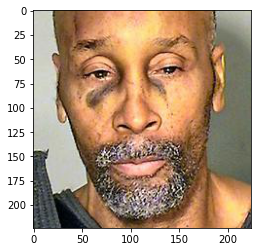

In [15]:
plt.imshow(loaded_images1[2024], cmap='binary')

In [16]:
tdi = loaded_images1
print (len(tdi))

2025


In [17]:
data= pd.read_excel("C:/Users/LM/ISJ/M2/TestEmbauche/datasetT.xlsx", sheet_name="Sheet1", header=None, index_col=0)
y = data.index
y2 = []
for i in y:
    y2.append(i)
#print(y2)
y = np.array(y2)
print(y.shape)

print(len(data))
#print(tdi)
X = np.array(tdi)
print(y.shape)
print(X.shape)

(2025,)
2025
(2025,)
(2025, 224, 224, 3)


In [18]:
print(X[2].shape)

(224, 224, 3)


In [19]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.10, random_state=1)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(1822, 224, 224, 3)
(203, 224, 224, 3)
(1822,)
(203,)


In [20]:
# creating validation data snd scaling data to range (0-1)
X_valid, X_train = X_train[:200], X_train[200:] / 255
y_valid, y_train = y_train[:200], y_train[200:]
X_test = X_test / 255

In [21]:
# Verifying shape of data
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((1622, 224, 224, 3),
 (1622,),
 (200, 224, 224, 3),
 (200,),
 (203, 224, 224, 3),
 (203,))

In [22]:
X_train[0].shape

(224, 224, 3)

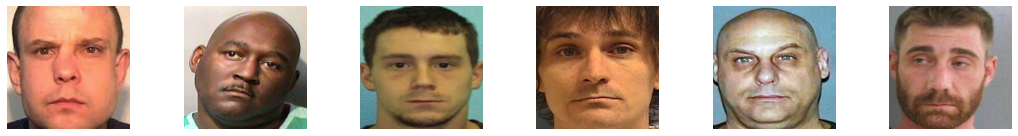

In [23]:
# looking at first three images

plt.figure(figsize = (15, 2))
plotnumber = 1

for i in range(6):
    if plotnumber <= 6:
        ax = plt.subplot(1, 6, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()

In [24]:
#Creating a list of item names (index corresponds to label class) 
class_names = ["Black", "White"]

In [25]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
class_names[y_train[0]], class_names[y_train[1]], class_names[y_train[2]] 

1
0
1


('White', 'Black', 'White')

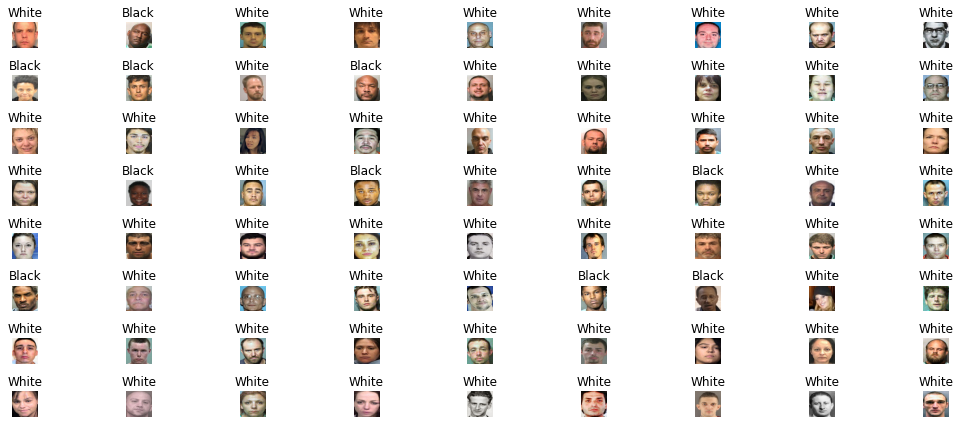

In [26]:
# looking at first 72 images

plt.figure(figsize = (15, 6))
plotnumber = 1

for i in range(73):
    if plotnumber <= 72:
        ax = plt.subplot(8, 9, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_train[i]], fontdict={ 'fontSize': 12, 'color': 'black'})
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()

In [27]:
count = 0
for i in y:
    if i == 0:
        count += 1
print(count)
print(len(y)- count)

332
1693


In [82]:
dim_learning_rate = Real(low=1e-6, high=1e-2, prior='log-uniform',
                         name='learning_rate')
dim_num_dense_layers = Integer(low=1, high=5, name='num_dense_layers')
dim_num_dense_nodes = Integer(low=5, high=512, name='num_dense_nodes')
dim_activation = Categorical(categories=['relu', 'sigmoid'],
                             name='activation')
dimensions = [dim_learning_rate,
              dim_num_dense_layers,
              dim_num_dense_nodes,
              dim_activation]
default_parameters = [1e-5, 1, 16, 'relu']

In [83]:
validation_data = (X_valid, y_valid)

In [84]:
y_train

array([1, 0, 1, ..., 1, 0, 1])

In [168]:
#Model Creation
import tensorflow as tf
from tensorflow import keras

num_filters = 8
filter_size = 3
pool_size = 2

model = keras.models.Sequential([
    keras.layers.Conv2D(num_filters*2, filter_size, input_shape=[224, 224, 3]),
    keras.layers.MaxPooling2D(pool_size=pool_size),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = 'softmax')
])

In [169]:
# compiling model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [170]:
# fitting model
model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 30)

Epoch 1/30
51/51 [==============================] - 61s 1s/step - loss: 0.5418 - accuracy: 0.8385 - val_loss: 35.9664 - val_accuracy: 0.8200
Epoch 2/30
51/51 [==============================] - 47s 917ms/step - loss: 0.3079 - accuracy: 0.8693 - val_loss: 30.9053 - val_accuracy: 0.8650
Epoch 3/30
51/51 [==============================] - 53s 1s/step - loss: 0.2520 - accuracy: 0.9014 - val_loss: 34.2803 - val_accuracy: 0.8700
Epoch 4/30
51/51 [==============================] - 47s 909ms/step - loss: 0.2512 - accuracy: 0.9007 - val_loss: 57.4232 - val_accuracy: 0.8550
Epoch 5/30
51/51 [==============================] - 44s 860ms/step - loss: 0.2101 - accuracy: 0.9118 - val_loss: 65.7576 - val_accuracy: 0.8600
Epoch 6/30
51/51 [==============================] - 45s 884ms/step - loss: 0.1998 - accuracy: 0.9309 - val_loss: 154.6199 - val_accuracy: 0.8450
Epoch 7/30
51/51 [==============================] - 44s 869ms/step - loss: 0.1597 - accuracy: 0.9359 - val_loss: 57.7058 - val_accuracy: 0.87

In [171]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 117ms/step - loss: 0.5396 - accuracy: 0.9113


[0.5395953059196472, 0.9113300442695618]

In [172]:
y_probs = model.predict(X_test)
y_preds = y_probs.argmax(axis = 1)

y_preds[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [173]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
    model.predict(X_test)
y_preds = y_probs.argmax(axis = 1)

y_preds[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

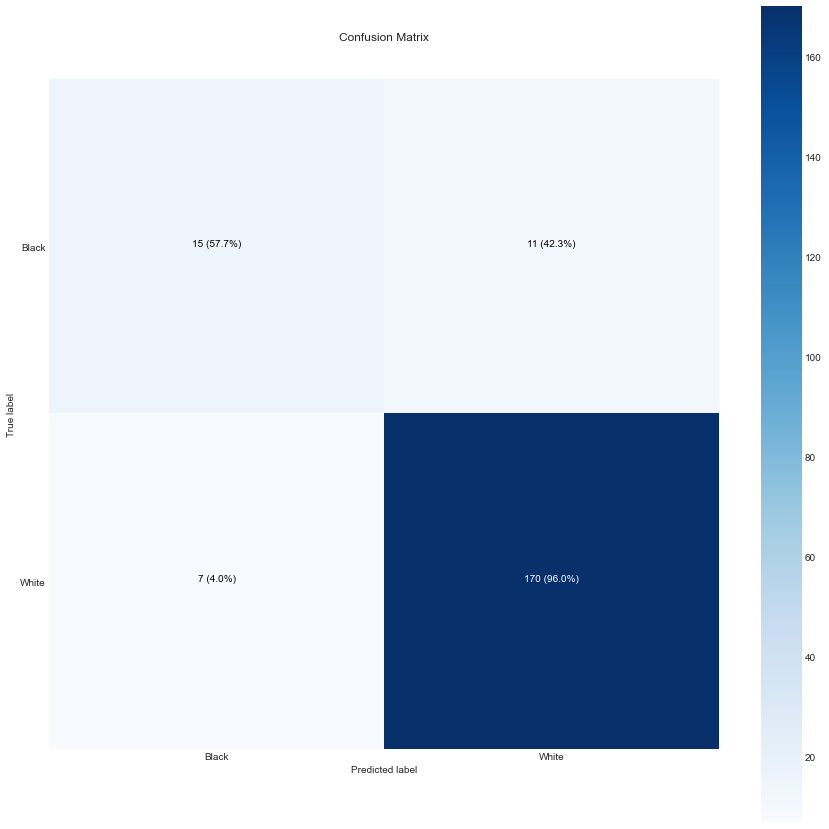

In [174]:
plt.style.use('seaborn-dark')
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [175]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i].reshape(3, 224, 224)
  print (target_image.shape)
  pred_probs = model.predict(target_image) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or redplt.figure(figsize = (15, 12))
plotnumber = 1


In [176]:
#Crop images
def resize2(img_path, max_px_size, output_folder):
    count = 0
    for filename in listdir(img_path):
        im_path = os.path.join(img_path, filename)
        print(im_path)
        with Image.open(im_path) as img:
            width_0, height_0 = img.size
            out_f_name = os.path.split(filename)[-1]
            out_f_path = os.path.join(output_folder, out_f_name)

            #if max((width_0, height_0)) <= max_px_size:
            #    #print('writing {} to disk (no change from original)'.format(out_f_path))
            #    img.save(out_f_path)
            #    print(img.size)
            #    count += 1

            if width_0 > height_0:
                #print('writing {} to disk'.format(out_f_path))
                img_width, img_height = img.size
                wc = 180 - img_width
                if wc < 0:
                    wc = wc * -1
                    print(img.size)
                    img = img.crop((wc, 0, 180, img_height))
                else:
                    wc = 0
                print(wc)
                img.save(out_f_path)
                count += 1

            if width_0 <= height_0:
                img_width, img_height = img.size
                wc = 180 - img_width
                if wc < 0:
                    wc = wc * -1
                    print(img.size)
                    img = img.crop((wc, 0, 180, img_height))
                else:
                    wc = 0
                print(wc)
                img.save(out_f_path)
                count += 1
            
    print(count)

In [177]:
resize2('testF', 224, 'testF_')

testF\1.jpg
(232, 221)
52
testF\2.jpg
(230, 160)
50
testF\3.jpg
0
testF\4.jpg
0
testF\5.jpg
(269, 292)
89
5


In [178]:
#Resize Images
resize('testF_', 224, 'testF__')

testF_\1.jpg
(224, 224)
testF_\2.jpg
(224, 224)
testF_\3.jpg
(224, 224)
testF_\4.jpg
(224, 224)
testF_\5.jpg
(224, 224)
5


In [179]:
#Load all images in a directory
from os import listdir
from PIL import Image
from matplotlib import image
# load all images in a directory
loaded_images2 = []
count = 0
for filename in listdir('testF__'):
    # load image
    #img_data = image.imread('2025/' + filename)
    img_data = Image.open('testF__/' + filename)
    loaded_images2.append(np.array(img_data))
    print('> loaded %s %s %s' % (filename, img_data.size, loaded_images2[count].shape))
    count += 1

> loaded 1.jpg (224, 224) (224, 224, 3)
> loaded 2.jpg (224, 224) (224, 224, 3)
> loaded 3.jpg (224, 224) (224, 224, 3)
> loaded 4.jpg (224, 224) (224, 224, 3)
> loaded 5.jpg (224, 224) (224, 224, 3)


In [180]:
X = np.array(loaded_images2)
X.shape

(5, 224, 224, 3)

In [181]:
y_probs = model.predict(X)
y_ppreds = y_probs.argmax(axis = 1)
print(y_ppreds)

[0 1 0 1 1]


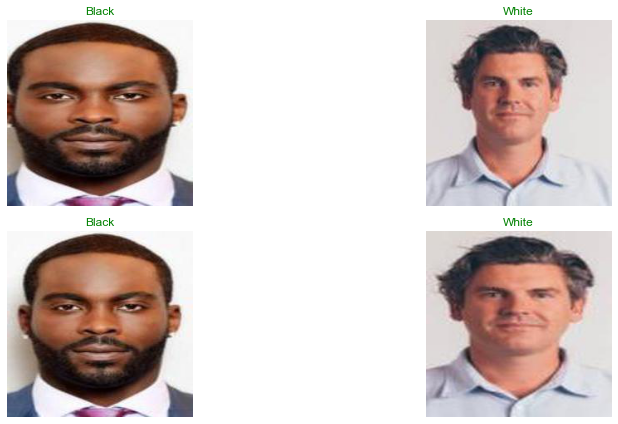

In [187]:
plt.figure(figsize = (15, 6))
plotnumber = 1
y_real = [0, 1, 0, 1]

for i in range(5):
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        plt.imshow(X[i], cmap = 'binary')
        plt.axis('off')
        if y_ppreds[i] == y_real[i]:
            plt.title(class_names[y_ppreds[i]], fontdict={ 'fontSize': 12, 'color': 'green'})
        else:
            plt.title(class_names[y_ppreds[i]], fontdict={ 'fontSize': 12, 'color': 'red'})
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()